<a href="https://colab.research.google.com/github/wliberatoc/PI/blob/main/05_10_Tarefas_da_Terceira_Semana_(ERE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

# 1. Adição de Imagens

No vídeo abaixo, eu mostro uma maneira de se fazer adição de imagens (inserir uma imagem menor dentro de uma imagem maior), podendo inclusive combinar esse efeito com a transparência.

<a href="https://www.youtube.com/watch?v=60k962jJAmE"><img src="https://img.youtube.com/vi/60k962jJAmE/mqdefault.jpg"/></a>

Dito isso, faça um algoritmo que receba uma imagem e insira uma marca d'água sobre essa figura. Considere a imagem abaixo como referência.

image.png

Imagem original


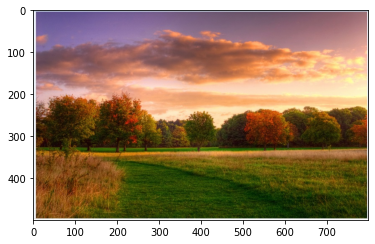

Marca D'agua


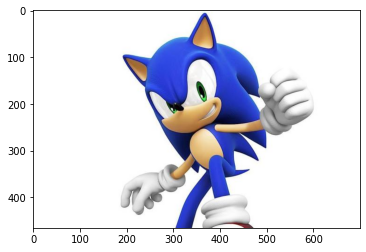

digite a posição y da marca dágua: 5
digite a posição x da marca dágua: 20
Imagem com marca


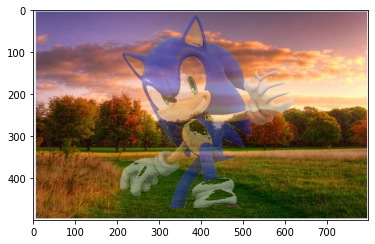

In [5]:
import numpy as np
import cv2

def adicionarMarca(img, marca):
  a, l, _ = img.shape
  pY = int(input("digite a posição y da marca dágua: "))
  pX = int(input("digite a posição x da marca dágua: "))
  aM, lM, _ = marca.shape
  if aM > a or lM > l:
    img = cv2.resize(img,(aM,lM))
  for y in range(0, aM):
    for x in range(0, lM):
      if(marca.item(y,x,0) < 240 and marca.item(y,x,1) < 240 and marca.item(y,x,2) < 240):
         red = int((img.item(y+pY,x+pX,0) * (0.5)) + (marca.item(y,x,0) * 0.5))
         green = int((img.item(y+pY,x+pX,1) * (0.5)) + (marca.item(y,x,1) * 0.5))
         blue = int((img.item(y+pY,x+pX,2) * (0.5)) + (marca.item(y,x,2) * 0.5))
         img.itemset((y+pY,x+pX,0), red)
         img.itemset((y+pY,x+pX,1), green)
         img.itemset((y+pY,x+pX,2), blue)

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/fundo.jpg")
marca = cv2.imread("/content/drive/My Drive/Colab Notebooks/PI/sonic.jpg")
from matplotlib import  pyplot as plt
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
marca = cv2.cvtColor(marca, cv2.COLOR_BGR2RGB)
print("Imagem original")
plt.imshow(img)
plt.show()
print("Marca D'agua")
plt.imshow(marca)
plt.show()
adicionarMarca(img,marca)
print("Imagem com marca")
plt.imshow(img)
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Rastreamento (Tracking)

Quando falamos do rastreamento de um objeto, estamos nos referindo a uma aplicação que "acompanha" o movimento de um objeto em um vídeo, marcando a posição dele tipicamente em caixas envolventes. Abaixo tem-se um exemplo:

<img src="https://i.pinimg.com/originals/41/36/f9/4136f909c378936cdf33f2cd975d081c.gif"/>

Nesse exercício, implemente o rastreio de um objeto com uma cor definida, nos moldes do exemplo do vídeo abaixo.

<a href="https://www.youtube.com/watch?v=M2wcIsMXPEA"><img src="https://img.youtube.com/vi/M2wcIsMXPEA/mqdefault.jpg"/></a>

In [ ]:
#para funcionar tem que ser um aquivo no computador
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while (True):
  _, frame = cap.read()
  hsvFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  #intervalo da cor que quero pegar
  lowerYellow  = np.array([25,50,0])
  upperYellow  = np.array([50,255,255])
  mask = cv2.inRange(hsvFrame, lowerYellow, upperYellow)
  contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  i=0
  if(contours):
    maxArea = cv2.contourArea(contours[0])
    for cnt in contours:
      if maxArea < cv2.contourArea(cnt):
        maxArea = cv2.contourArea(cnt)
        idContourMaxArea = i
      i += 1

    x, y, w, h = cv2.boundingRect(contours[idContourMaxArea])
    if maxArea > 50.0:      
      cv2.rectangle(frame, (x,y), (x+w,y+h),(255,0,0), 3)
  
  cv2.imshow('frame', frame)
  #cv2.imshow('mascara',mask)
  if cv2.waitKey(1) & 0xFF == ord('q'):
      break

cap.release()
cv2.destroyAllWindows()

error: ignored

#3. Proposta do Trabalho Final

Acesse o SIGAA e no fórum "Proposta de Trabalho Final", você deve elaborar o conceito do seu trabalho final.

Essa proposta deverá constar de:

* Tema (Reconhecimento de Faces? Diagnóstico de Doenças por Imagem? Verificação de Qualidade em Linha de Montagem por Imagem? Astronomia e Machine Learning?)
* Problema a ser Resolvido (Se seu protótipo der certo, qual solução ele trará a sociedade? Para qual finalidade ele será usado?)
* Método a ser usado (Qual algoritmo você implementará para resolver o problema apontado?)

